# Lab | Customer Analysis Round 2

For this lab, we will be using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder. Check out the `files_for_lab/about.md` to get more information if you are using the Online Excel.

**Note**: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

In [97]:
import pandas as pd
import numpy as np

In [98]:
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

### Dealing with the data

1. Show the dataframe shape.
2. Standardize header names.
3. Which columns are numerical?
4. Which columns are categorical?
5. Check and deal with `NaN` values.
6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. _Hint_: If data from March does not exist, consider only January and February.
7. BONUS: Put all the previously mentioned data transformations into a function.

#### 1.Show the dataframe shape.

In [99]:
df.shape

(10910, 26)

#### 2.Standardize header names.

In [100]:
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [101]:
df_new = df.copy()
df_new.columns = [col.lower().replace(" ", "_") for col in df_new.columns]
df_new.head(1)

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.21696,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.8,Four-Door Car,Medsize,NaN


#### 3.Which columns are numerical?

###### option 1

In [102]:
numeric_columns = list(df_new._get_numeric_data().columns)
#display(df_new._get_numeric_data().head(1))
numeric_columns

['unnamed:_0',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

##### option 2

In [103]:

num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
list(df_new.select_dtypes(num))


#int and float alone does not give back all int and float values. Why?

['unnamed:_0',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

#### 4.Which columns are categorical?

In [104]:
categorial_columns = list(df_new.select_dtypes('object'))
categorial_columns

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

#### 5. Check and deal with NaN values.

In [105]:
null_val = (df_new.isna().sum())
null_val = null_val.to_dict()
#null_val





In [106]:
nan_col = [k for k in null_val if null_val[k] > 0]
nan_col

['state',
 'response',
 'months_since_last_claim',
 'number_of_open_complaints',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [107]:
df_new[nan_col].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,10279,5,California,3552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
response,10279,2,No,8813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
months_since_last_claim,10277.0,NaN,NaN,NaN,15.149071,10.080349,0.0,6.0,14.0,23.0,35.0
number_of_open_complaints,10277.0,NaN,NaN,NaN,0.384256,0.912457,0.0,0.0,0.0,0.0,5.0
vehicle_class,10288,6,Four-Door Car,5212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_size,10288,3,Medsize,7251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_type,5428,1,A,5428,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### NullV - State

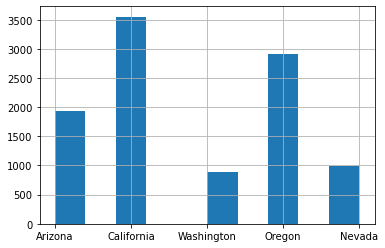

In [108]:
df_new['state'].hist() #i do not feel compfortable with filling in all the NaN with CA. However it is the most frequent value

df_new['state'] = df_new['state'].fillna('California')




##### NullV - Number of open complaints

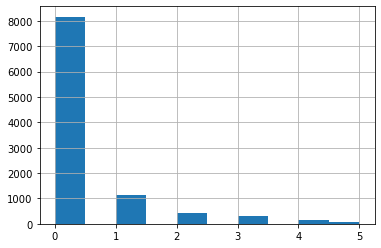

In [109]:
df_new['number_of_open_complaints'].unique()
df_new['number_of_open_complaints'].hist() # I chose this: Because the amount of 0 complaints open is obviously the most frequent value.

#df_new['number_of_open_complaints'].dtype
df_new['number_of_open_complaints'] = df_new['number_of_open_complaints'].fillna(0) 

 
# I chose this: Because the amount of 0 complaints open is obviously the most frequent value.

##### NullV - Response

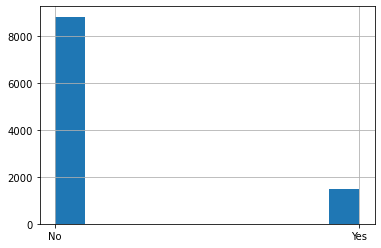

In [110]:
df_new['response'].unique()
df_new['response'].hist()

df_new['response'] = df_new['response'].fillna('No)')

##### NullV Months since

In [111]:

#df_new['months_since_last_claim'].isna().sum()/len(df_new['months_since_last_claim'])*100

df_new['months_since_last_claim'] = df_new['months_since_last_claim'].fillna(df_new['months_since_last_claim'].median()) 

#I used the median instead of the mean because of the right skewed distribution or historgram



##### NullV - Vehicle size and class

['Medsize' 'Small' 'Large' nan]
['Four-Door Car' 'SUV' 'Two-Door Car' 'Sports Car' 'Luxury Car'
 'Luxury SUV' nan]


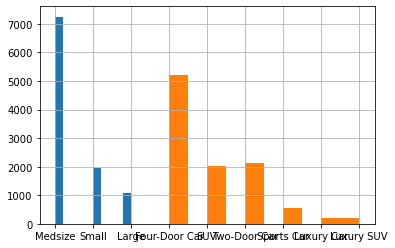

In [112]:
print(df_new['vehicle_size'].unique())
print(df_new['vehicle_class'].unique())

df_new['vehicle_size'].hist()
df_new['vehicle_class'].hist()

df_new['vehicle_size'] =  df_new['vehicle_size'].fillna('Medsize')
df_new['vehicle_class'] = df_new['vehicle_class'].fillna('Four-Door Car')

# I chose the most common value in the df

##### NullV - Vehicle Type

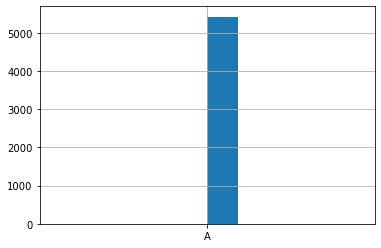

In [113]:
df_new['vehicle_type'].unique()
df_new['vehicle_type'].hist()

df_new['vehicle_type'] = df_new['vehicle_type'].fillna('A') #because this is the only value besided NaN 


In [57]:
df_new.isna().sum()

unnamed:_0                       0
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

#### 6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [123]:
df_new['effective_to_date'] = pd.to_datetime(df_new['effective_to_date'], errors ="coerce")


df_new['month'] = [item.month for item in df_new['effective_to_date']]

#df_new[(df_new['month'] == 1) | (df_new['month'] == 2)]

df_new[(df_new['month'] < 4)]

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


## BONUS

#### Put all the previously mentioned data transformations into a function.

In [140]:
file = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

def lab2(f):
    f.columns = [col.lower().replace(" ", "_") for col in f.columns] #Standardize Columns

    #NVULL 

    f['state'] = f['state'].fillna('California')
    f['number_of_open_complaints'] = f['number_of_open_complaints'].fillna(0)
    f['vehicle_size'] =  f['vehicle_size'].fillna('Medsize')
    f['vehicle_class'] = f['vehicle_class'].fillna('Four-Door Car')
    f['vehicle_type'] = f['vehicle_type'].fillna('A') 
    
    #DATE

    f['effective_to_date'] = pd.to_datetime(f['effective_to_date'], errors ="coerce")
    f['month'] = [item.month for item in f['effective_to_date']]
    
    db_1qu = f[(f['month'] < 4)]

    return display(f, db_1qu)
    
lab2(file)

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2
